<a href="https://colab.research.google.com/github/iam1997/Project-03-Chevron-Equipment-Maintenance-Data-/blob/main/Machine_LearningChevron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [3]:
df = pd.read_csv('/content/WorkOders15_18 Corrective.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,WorkOrder,FieldProductionTeam,Comment,EquipmentCode,EquipmentRollupCode,EquipmentDescription,EquipmentType,EquipmentClass,EquipmentCriticality,StatusCode,StatusDescription,StatusShortDescription,Priority,WOType,JobType,Action,Requirement,Cause,FailureReason,Duration,GrossProductionLoss,AffectedProduction,IsAffectingProduction,LaborCost,MaterialCost,TotalCost,Assigned,Trade,TradeGroup,SupervisorRole,Manufacturer,Model,Safety,Reopened,CreatedBy,UpdatedBy,CreatedDate,UpdatedDate,ReportDate,ReportMonth,ReportWeekDay,TargetDate,SchEndDate,ActualDuration,ScheduleCompliant,PMOverdue,CompletedDate,CompletedMonth,CompletedWeekDay,TBF,TBF_Equipment
0,15516284,RANGELY,CS03; LPGAS LINE FROZEN/PLUGGED,C35CS03,C35CS03,COLLECTION STATION; 03,System,SE - Battery,NA - Not Applicable,C,C - Closed - Sent to History,Closed(C),2,JOB,Corrective Repair,Serviced,Process Leaks,Plugged,Pipe - Piping,1,0,0,No,1400,300,1700,Rangely Gang 3,Gang (3 Person),Mechanical,Surface Maintenance Supervisor,NOTAPPLICABLE,NONE,N,N,"LANOUE, RICK","LANOUE, RICK",02/01/15,02/01/15,31/12/14,12,4,01/01/15,01/01/15,-1,Future Week,None,01/01/15,1,5,0,4.0
1,15506143,VAN,401-1D: NEW CHEMICAL PUMP & ELECTRICAL,CQ3253FL1,CQ3253FL1,LINE; PRODUCTION FLOW FOR CVWU 4011,System,Line - Production Flowline,3 - Low,C,C - Closed - Sent to History,Closed(C),4,JOB,Corrective Repair,New Installation,Electrical Problems,Missing,"Assembly - Pump, Chemical",1,0,0,No,200,500,700,"TURPIN, WILLIAM",Electronic Instrument Specialist,Electric,Surface Maintenance Supervisor,NOTAPPLICABLE,NONE,N,N,"BOWDOIN, CHRISTOPHER","BOWDEN, BRIAN",29/12/14,02/01/15,29/12/14,12,2,01/01/15,01/01/15,3,Future Week,None,01/01/15,1,5,0,NaN
2,15476748,VAN,D: 14-7: BELTS ARE STILL LOOSE,22B0359734,22B0359734,PUMPUNIT; SWAIN WF 14-7 +,Asset,Pumping Unit,3 - Low,C,C - Closed - Sent to History,Closed(C),3,JOB,Corrective Repair,Adjusted / Calibrated,Inspection/Condition Monitoring,Loose,Component - Belt,1,0,4,Yes,100,200,300,"BOWDEN, BRIAN",Planner Scheduler,Admin,Surface Maintenance Supervisor,LUFKIN,M320D-213-120,N,N,"CLYBURN, JOHN","BOWDEN, BRIAN",12/12/14,02/01/15,12/12/14,12,6,01/01/15,01/01/15,19,Future Week,None,01/01/15,1,5,0,1.0
3,15476785,VAN,D: NEIL 115 SW CVWU 64-1 INJECTION WELL NEED ...,VAN,VAN,VAN OPERATIONS,System,SE - Field,NA - Not Applicable,C,C - Closed - Sent to History,Closed(C),3,JOB,Corrective Repair,New Installation,New Installation,Improper Fit,Pipe - Piping,1,0,0,No,107,350,457,"BOWDEN, BRIAN",Planner Scheduler,Admin,Surface Maintenance Supervisor,NOTAPPLICABLE,NONE,N,N,"MOORE, REGGIE","BOWDEN, BRIAN",12/12/14,02/01/15,12/12/14,12,6,01/01/15,01/01/15,19,Future Week,None,01/01/15,1,5,0,0.0
4,15477769,VAN,D: SWAIN 14 SWD THE NORTH DISPOSAL DISCHARGE ...,VAN,VAN,VAN OPERATIONS,System,SE - Field,NA - Not Applicable,C,C - Closed - Sent to History,Closed(C),3,JOB,Corrective Repair,Repaired,Pressure Problem,Fouling,"Pump, other",1,0,0,No,133,350,483,"BOWDEN, BRIAN",Planner Scheduler,Admin,Surface Maintenance Supervisor,NOTAPPLICABLE,NONE,N,N,"MOORE, REGGIE","BOWDEN, BRIAN",13/12/14,02/01/15,13/12/14,12,7,01/01/15,01/01/15,19,Future Week,None,01/01/15,1,5,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89480 entries, 0 to 89479
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FieldProductionTeam    89480 non-null  object 
 1   EquipmentType          89480 non-null  object 
 2   EquipmentClass         89480 non-null  object 
 3   EquipmentCriticality   89480 non-null  object 
 4   Priority               89480 non-null  object 
 5   Cause                  89480 non-null  object 
 6   FailureReason          89480 non-null  object 
 7   Duration               89480 non-null  int64  
 8   GrossProductionLoss    89480 non-null  int64  
 9   AffectedProduction     89480 non-null  int64  
 10  IsAffectingProduction  89480 non-null  object 
 11  TotalCost              89480 non-null  int64  
 12  Manufacturer           89480 non-null  object 
 13  Safety                 89480 non-null  object 
 14  Reopened               89480 non-null  object 
 15  Ac

In [4]:
df.drop(columns=['WorkOrder', 'Comment', 'EquipmentCode', 'EquipmentRollupCode', 'EquipmentDescription', 'StatusCode', 'StatusDescription', 
                 'StatusShortDescription', 'WOType', 'JobType', 'Action', 'Requirement', 'LaborCost', 'MaterialCost', 'Assigned', 'Trade', 
                 'TradeGroup', 'SupervisorRole', 'Model', 'CreatedBy', 'UpdatedBy', 'CreatedDate', 'UpdatedDate', 'ReportDate', 
                 'ReportMonth', 'ReportWeekDay', 'TargetDate', 'SchEndDate', 'ScheduleCompliant', 'PMOverdue', 'CompletedDate', 
                 'CompletedMonth', 'CompletedWeekDay'], inplace = True)

In [5]:
df = df.fillna(0)
df.head()

,FieldProductionTeam,EquipmentType,EquipmentClass,EquipmentCriticality,Priority,Cause,FailureReason,Duration,GrossProductionLoss,AffectedProduction,IsAffectingProduction,TotalCost,Manufacturer,Safety,Reopened,ActualDuration,TBF,TBF_Equipment
0,RANGELY,System,SE - Battery,NA - Not Applicable,2,Plugged,Pipe - Piping,1,0,0,No,1700,NOTAPPLICABLE,N,N,-1,0,4.0
1,VAN,System,Line - Production Flowline,3 - Low,4,Missing,"Assembly - Pump, Chemical",1,0,0,No,700,NOTAPPLICABLE,N,N,3,0,0.0
2,VAN,Asset,Pumping Unit,3 - Low,3,Loose,Component - Belt,1,0,4,Yes,300,LUFKIN,N,N,19,0,1.0
3,VAN,System,SE - Field,NA - Not Applicable,3,Improper Fit,Pipe - Piping,1,0,0,No,457,NOTAPPLICABLE,N,N,19,0,0.0
4,VAN,System,SE - Field,NA - Not Applicable,3,Fouling,"Pump, other",1,0,0,No,483,NOTAPPLICABLE,N,N,19,0,0.0


In [ ]:
df.columns

Index(['FieldProductionTeam', 'EquipmentType', 'EquipmentClass',
       'EquipmentCriticality', 'Priority', 'Cause', 'FailureReason',
       'Duration', 'GrossProductionLoss', 'AffectedProduction',
       'IsAffectingProduction', 'TotalCost', 'Manufacturer', 'Safety',
       'Reopened', 'ActualDuration', 'TBF', 'TBF_Equipment', 'Class1',
       'Class0', 'Class2', 'Class3', 'Class4', 'Class5'],
      dtype='object')

In [6]:
df['Class1'] = np.where(df['Duration'] > 7, df['Duration'], 1)
df['Class0'] = np.where(df['Class1'] <= 7, df['Class1'], 0)
df['Class2'] = np.where(df['TotalCost'] > 6520, df['TotalCost'], 1)
df['Class3'] = np.where(df['Class2'] <= 6520, df['Class2'], 0)
df['Class4'] = np.where(df['TBF_Equipment'] > 40, df['TBF_Equipment'], 1)
df['Class5'] = np.where(df['Class4'] <= 40, df['Class4'], 0)
df.head()

,FieldProductionTeam,EquipmentType,EquipmentClass,EquipmentCriticality,Priority,Cause,FailureReason,Duration,GrossProductionLoss,AffectedProduction,IsAffectingProduction,TotalCost,Manufacturer,Safety,Reopened,ActualDuration,TBF,TBF_Equipment,Class1,Class0,Class2,Class3,Class4,Class5
0,RANGELY,System,SE - Battery,NA - Not Applicable,2,Plugged,Pipe - Piping,1,0,0,No,1700,NOTAPPLICABLE,N,N,-1,0,4.0,1,1,1,1,1.0,1.0
1,VAN,System,Line - Production Flowline,3 - Low,4,Missing,"Assembly - Pump, Chemical",1,0,0,No,700,NOTAPPLICABLE,N,N,3,0,0.0,1,1,1,1,1.0,1.0
2,VAN,Asset,Pumping Unit,3 - Low,3,Loose,Component - Belt,1,0,4,Yes,300,LUFKIN,N,N,19,0,1.0,1,1,1,1,1.0,1.0
3,VAN,System,SE - Field,NA - Not Applicable,3,Improper Fit,Pipe - Piping,1,0,0,No,457,NOTAPPLICABLE,N,N,19,0,0.0,1,1,1,1,1.0,1.0
4,VAN,System,SE - Field,NA - Not Applicable,3,Fouling,"Pump, other",1,0,0,No,483,NOTAPPLICABLE,N,N,19,0,0.0,1,1,1,1,1.0,1.0


## Duration

In [68]:
y_true = df['Class0']
X = df[['TotalCost', 'GrossProductionLoss', 'AffectedProduction', 'FieldProductionTeam', 'EquipmentClass']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

cat_features = ['FieldProductionTeam', 'EquipmentClass']

In [70]:
model = CatBoostClassifier(random_state=1110, eval_metric='F1')

In [71]:
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))

Learning rate set to 0.08476
0:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 59.1ms	remaining: 59.1s
1:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 117ms	remaining: 58.6s
2:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 178ms	remaining: 59.3s
3:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 245ms	remaining: 1m
4:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 303ms	remaining: 1m
5:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 362ms	remaining: 59.9s
6:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 420ms	remaining: 59.5s
7:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 490ms	remaining: 1m
8:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 544ms	remaining: 59.9s
9:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 605ms	remaining: 59.9s
10:	learn: 0.9886694	test: 0.9891835	best: 0.9891835 (0)	total: 664ms	remaining: 59.7s
11:	learn: 0.9886694	test: 0.989

In [72]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.10      0.18       362
           1       0.98      1.00      0.99     17534

    accuracy                           0.98     17896
   macro avg       0.88      0.55      0.59     17896
weighted avg       0.98      0.98      0.97     17896



In [74]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[   37   325]
 [   10 17524]]


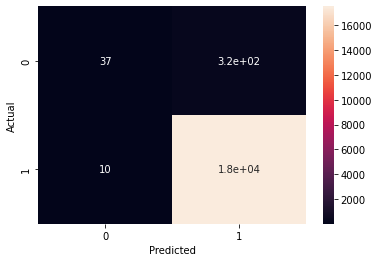

In [75]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

## Total Cost

In [44]:
y_true = df['Class3']
X = df[['Duration', 'GrossProductionLoss', 'AffectedProduction', 'FieldProductionTeam', 'EquipmentClass']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

cat_features = ['FieldProductionTeam', 'EquipmentClass']

In [46]:
model = CatBoostClassifier(random_state=1110, eval_metric='F1')

In [47]:
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))

Learning rate set to 0.08476
0:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 54.1ms	remaining: 54s
1:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 108ms	remaining: 54.1s
2:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 176ms	remaining: 58.5s
3:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 236ms	remaining: 58.8s
4:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 300ms	remaining: 59.7s
5:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 359ms	remaining: 59.4s
6:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 410ms	remaining: 58.1s
7:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 470ms	remaining: 58.3s
8:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 523ms	remaining: 57.6s
9:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 574ms	remaining: 56.9s
10:	learn: 0.9951430	test: 0.9950020	best: 0.9950020 (0)	total: 636ms	remaining: 57.2s
11:	learn: 0.9951430	test

In [48]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.55      0.03      0.06       178
           1       0.99      1.00      1.00     17718

    accuracy                           0.99     17896
   macro avg       0.77      0.52      0.53     17896
weighted avg       0.99      0.99      0.99     17896



In [50]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[    6   172]
 [    5 17713]]


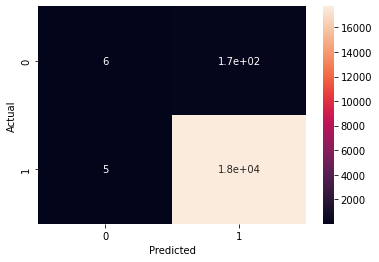

In [51]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

## Time between reports

In [52]:
y_true = df['Class5']
X = df[['Duration', 'GrossProductionLoss', 'TotalCost', 'FieldProductionTeam', 'EquipmentClass']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

cat_features = ['FieldProductionTeam', 'EquipmentClass']

In [54]:
model = CatBoostClassifier(random_state=1110, eval_metric='F1')

In [55]:
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))

Learning rate set to 0.08476
0:	learn: 0.8402938	test: 0.8396343	best: 0.8396343 (0)	total: 60.6ms	remaining: 1m
1:	learn: 0.8403158	test: 0.8397303	best: 0.8397303 (1)	total: 90.3ms	remaining: 45.1s
2:	learn: 0.8403158	test: 0.8397303	best: 0.8397303 (1)	total: 124ms	remaining: 41.2s
3:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 188ms	remaining: 46.8s
4:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 234ms	remaining: 46.5s
5:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 278ms	remaining: 46.1s
6:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 335ms	remaining: 47.5s
7:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 378ms	remaining: 46.8s
8:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 409ms	remaining: 45s
9:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 473ms	remaining: 46.8s
10:	learn: 0.8403067	test: 0.8397303	best: 0.8397303 (1)	total: 515ms	remaining: 46.3s
11:	learn: 0.8403067	test: 

In [56]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.01      0.02      5082
           1       0.72      1.00      0.83     12814

    accuracy                           0.72     17896
   macro avg       0.68      0.50      0.43     17896
weighted avg       0.70      0.72      0.60     17896



In [58]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[   56  5026]
 [   31 12783]]


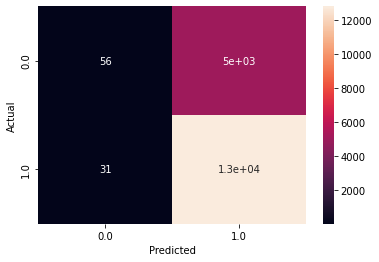

In [59]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)